In [4]:
import re 
re.match(r"a*a", "aaaa") 



<re.Match object; span=(0, 4), match='aaaa'>

In [5]:
re.match(r"a*?a", "aaaa")



<re.Match object; span=(0, 1), match='a'>

In [ ]:

# re.match(r"a*+a", "aaaa") # 안됨 

In [ ]:
import re

text = """Ross McFluff: 834.345.1254  
Ronald Heathmore: 892.345.3428
Frank Burger: 925.541.7625 
Heather Albrecht: 548.326.4584"""

# 정규표현식으로 전화번호 포맷 변경
string = re.sub(r"(\d{3})[.\-]?(\d{3})[.\-]?(\d{4})", r"\1-\2-\3", text)

# 수정된 결과 출력
print(string)

# Ross McFluff: 834-345-1254  
# Ronald Heathmore: 892-345-3428
# Frank Burger: 925-541-7625 
# Heather Albrecht: 548-326-4584


Ross McFluff: 834-345-1254  
Ronald Heathmore: 892-345-3428
Frank Burger: 925-541-7625 
Heather Albrecht: 548-326-4584


In [13]:
import re

string = " 김규원 28395 sky high "
result = re.sub(r"[가-힣]", "", string)
print(result)  # "  28395 sky high "

  28395 sky high 


In [ ]:
import konlpy
from konlpy.tag import Kkma, Komoran, Okt, Hannanum

okt = Okt()
text = '코드잇에 오신 걸 환영합니다'

print(okt.morphs(text))


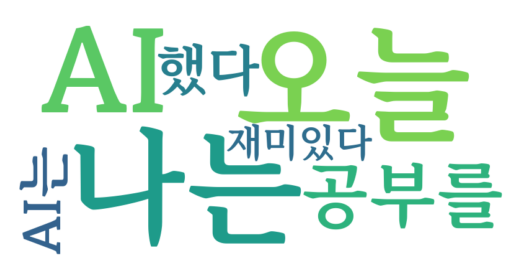

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "나는 오늘 AI 공부를 했다. AI는 재미있다."

# 정확한 .ttf 파일 경로 입력 (예: MaruBuri-Regular.ttf)
wordcloud = WordCloud(
    font_path=r"C:\Users\User\Desktop\MaruBuriTTF\MaruBuri-Bold.ttf",  # ✅ 파일명까지 써야 함!
    background_color="white",
    width=800,
    height=400 ).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


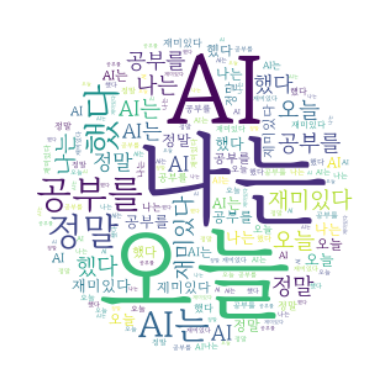

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. 사용할 텍스트 (한글도 OK)
text = "나는 오늘 AI 공부를 했다. AI는 정말 재미있다."

# 2. 원형 마스크 만들기 (300x300 이미지에 원형 모양)
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2  # 원 바깥은 True
mask = 255 * mask.astype(int)  # 0 또는 255로 변환 (WordCloud가 인식하는 방식)

# 3. 워드클라우드 생성 (폰트 + 마스크 모두 적용)
wc = WordCloud(
    font_path=r"C:\Users\User\Desktop\MaruBuriTTF\MaruBuri-Regular.ttf",  # ✅ 정확한 .ttf 경로로 수정
    background_color="white",
    repeat=True,
    mask=mask,
    width=300,
    height=300
).generate(text)

# 4. 시각화
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()


In [1]:
from konlpy.tag import Okt

okt = Okt()
text = "나는 오늘 AI 공부를 했다. AI는 정말 재미있다!"
print(okt.nouns(text))  # 명사만 추출

['나', '오늘', '공부', '정말']


In [17]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time

# 크롬 드라이버 경로
chrome_path = r"C:\Users\User\.cache\selenium\chromedriver\win64\136.0.7103.113\chromedriver.exe"
service = Service(chrome_path)
driver = webdriver.Chrome(service=service)

# 조선일보 메인 페이지 접속
driver.get("https://www.chosun.com/")
time.sleep(2)  # 로딩 기다림

# 기사 제목 요소 찾기
elements = driver.find_elements(By.CSS_SELECTOR, "a.story-card__headline")

# 제목 리스트 만들기
title_list = []
for e in elements:
    title = e.text.strip()
    if title:  # 빈 제목은 제외
        title_list.append(title)

driver.quit()

# 확인
print("수집된 기사 수:", len(title_list))
for title in title_list:
    print("-", title)


수집된 기사 수: 128
- 김용태 "이준석 단일화 거부 존중… 金, 3자대결 이길 것"
- 이재명, '공공의대 3곳·의대 1곳·의료원 1곳' 신설 공약
- 이낙연 "김문수 지지… 제7공화국 출범 위한 개헌추진 협력"
- 이재명 45~49%, 김문수 35% 안팎, 이준석 11%대
- [정우상 칼럼] '진짜 김문수'라면 알고 있을 마지막 퍼즐 해법
- 단독제주에 13년 뿌리내린 탈북민, 알고 보니 간첩이었다
- 마크롱, 아내에게 맞고 팔짱도 거부당했다? 불화설 일파만파
- 中 "2025년 제조업 석권"… 10년전 그 위협, 현실 됐다
- 은퇴스쿨아파트 일찍 줬더니 돌변한 아들, 효도계약서도 소용 없었다
- 최고의 글씨란 기교가 아니라… 세상을 위해 나를 버린 사람의 글씨
- 이강인, 두산家 5세와 함께…
공식석상서 다정한 모습 포착
- 알립니다매튜 본의 대표작
'백조의 호수' 30주년
독자 여러분을 초대합니다
- "싸우지 않고 대만 무너뜨릴 방법"
中군사잡지가 제시한 시나리오
- 경찰복 입고 교도소 문 걸어나갔다…
美 전직 경찰서장의 탈옥 수법
- 13년간 의붓딸 2092회 성폭력…
뒤늦게 안 친모, 목숨 끊었다
- 1140억원 복권 당첨됐는데 불법?
4개월째 상금 못 받은 이유는
- 주유건 꽂은 채 달린 운전자
'빵빵' 경적에 보인 반응이…
- 대선서도 실종된 통일 담론,
그래도 통일은 온다
- 李 무죄 만들기
법안들도 철회하길
- K영화 없는 칸,
K드라마 희미한 넷플릭스
- '검투사'의 국익은 어디로 갔나
- 대선 공약이 된 '플럼북'이란?
- 美대통령은 얼마나 오래 살까
- 폭스콘의 '타도 한국' 집념
- "평범한 직장인인 제가
이 3가지 원칙 지켜
100억원 벌었습니다"
- 하와이 이주한 일본인이
암에 많이 걸린 이유
- 정치인들에 책을 권한다면
- 서울시청 앞 광장
줄댕강나무에 담긴 사연
- 주한미군 '인계철선' 부대엔
北이 기겁하는 '강철비' 있다
- 대기업 신입 30%, 반수 한 '중고'
진짜 신입은 줄줄이 낙방
- 미국 장기채 ETF 1년 수익률

In [18]:
from konlpy.tag import Okt
from collections import Counter

okt = Okt()
nouns = []

for title in title_list:
    nouns += okt.nouns(title)

filtered = [n for n in nouns if len(n) > 1]
counted = Counter(filtered)
print(counted.most_common(20))


[('김문수', 8), ('이유', 6), ('이재명', 5), ('단독', 5), ('미국', 5), ('이준석', 4), ('글씨', 4), ('호수', 4), ('한국', 4), ('거부', 3), ('진짜', 3), ('최고', 3), ('세상', 3), ('위해', 3), ('매튜', 3), ('백조', 3), ('독자', 3), ('초대', 3), ('대선', 3), ('통일', 3)]


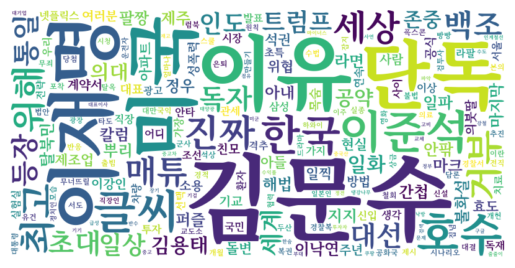

In [20]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time

# 4. 명사 필터링 & 빈도수 세기
filtered = [n for n in nouns if len(n) > 1]
counted = Counter(filtered)

# 5. 워드클라우드 생성
wc = WordCloud(
    font_path=r"C:\Users\User\Desktop\MaruBuriTTF\MaruBuri-Bold.ttf",  # 한글 폰트
    background_color="white",
    width=800,
    height=400
)
wc.generate_from_frequencies(dict(counted))

# 6. 시각화
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()